# <span style="color:cyan">Data Preparation</span>

## <span style="color:green">Install pakage and Import</span>

In [ ]:
pip install lxml

In [ ]:
import pandas as pd
import calendar

## Cleaning Dataset_born_thai_clean

In [ ]:
thai_month_map = {
    "มกราคม": "01",
    "กุมภาพันธ์": "02",
    "มีนาคม": "03",
    "เมษายน": "04",
    "พฤษภาคม": "05",
    "มิถุนายน": "06",
    "กรกฎาคม": "07",
    "สิงหาคม": "08",
    "กันยายน": "09",
    "ตุลาคม": "10",
    "พฤศจิกายน": "11",
    "ธันวาคม": "12"
}

def convert_thai_date(thai_date_str):
  """Converts a Thai date string (Month Year) to DD/MM/YYYY format."""
  month_thai, year_thai_buddhist_str = thai_date_str.split(' ')
  month_num = thai_month_map[month_thai]
  year_gregorian = int(year_thai_buddhist_str) - 543
  last_day = calendar.monthrange(year_gregorian, int(month_num))[1]
  return f"{last_day:02d}/{month_num}/{year_gregorian}"

name_proivence = ['กรุงเทพมหานคร', 'สมุทรปราการ', 'นนทบุรี', 'ปทุมธานี', 'พระนครศรีอยุธยา', 'อ่างทอง', 'ลพบุรี', \
                  'สิงห์บุรี', 'ชัยนาท', 'นครศรีธรรมราช', 'พังงา', 'สระบุรี', 'ชลบุรี', 'ระยอง', \
                  'จันทบุรี', 'ตราด', 'ฉะเชิงเทรา', 'ปราจีนบุรี', 'นครนายก', 'สระแก้ว', 'นครราชสีมา', \
                  'บุรีรัมย์', 'สุรินทร์', 'ศรีสะเกษ', 'อุบลราชธานี', 'ยโสธร', 'ชัยภูมิ', 'อำนาจเจริญ', \
                  'บึงกาฬ', 'หนองบัวลำภู', 'ขอนแก่น', 'อุดรธานี', 'เลย', 'หนองคาย', 'มหาสารคาม', \
                  'ร้อยเอ็ด', 'กาฬสินธุ์', 'สกลนคร', 'นครพนม', 'มุกดาหาร', 'เชียงใหม่', 'ลำพูน', \
                  'ลำปาง', 'อุตรดิตถ์', 'แพร่', 'พะเยา', 'น่าน', 'เชียงราย', 'แม่ฮ่องสอน', \
                  'นครสวรรค์', 'อุทัยธานี', 'กำแพงเพชร', 'ตาก', 'สุโขทัย', 'พิษณุโลก', 'พิจิตร', \
                  'เพชรบูรณ์', 'ราชบุรี', 'กาญจนบุรี', 'สุพรรณบุรี', 'นครปฐม', 'สมุทรสาคร', 'สมุทรสงคราม', \
                  'เพชรบุรี', 'ประจวบคีรีขันธ์', 'กระบี่', 'ภูเก็ต', 'สุราษฎร์ธานี', 'ระนอง', 'ชุมพร', \
                  'สงขลา', 'สตูล', 'ตรัง', 'พัทลุง', 'ปัตตานี', 'ยะลา', 'นราธิวาส']

df = pd.DataFrame()
for i in name_proivence:
    path = "สถิติจำนวนการเกิด_พื้นที่ จังหวัด{}.xls".format(str(i))
    df_born = pd.read_html(path,encoding="utf-8")
    df_born_clean = pd.DataFrame(df_born[0])
    df_born_clean.loc[:, 'พื้นที่':'รวม']
    df_born_clean.columns = df_born_clean.columns.get_level_values(-1)
    df_born_clean.rename(columns={'พื้นที่': 'Times'}, inplace=True)
    df_born_clean = df_born_clean[1:].reset_index(drop=True)
    df_born_clean.rename(columns={'ชาย': 'male','หญิง':'female','รวม':'total'}, inplace=True)
    df_born_clean['provinceNameThai']=str(i)
    df_born_clean['Times'] = df_born_clean['Times'].apply(convert_thai_date)
    df_born_clean['Times'] = pd.to_datetime(df_born_clean['Times'])
    df = pd.concat([df, df_born_clean], ignore_index=True)
else:
    df = df.sort_values(by='Times').reset_index(drop=True)
    # df.to_csv("Dataset_born_clean.csv", index=False, sep=",", encoding="utf-8")#use this for save in your Device
    print("Done!")

## Cleaning Dataset_people_thai_clean

In [ ]:
namefile_month = ["05","12"]
namefile_year = ["2015","2016","2017","2018","2019","2020","2021","2022","2023","2024","2025"]

df = pd.DataFrame()
for i in namefile_month:
    for j in namefile_year:
        if i == "12" and j == "2025":
            pass
        else:
            path = "แยกตามเพศ _พื้นที่ ทั่วประเทศ_{}_{}.xls".format(i,j)
            df_all = pd.read_html(path)
            df_all_clean = pd.DataFrame(df_all[0])
            df_all_clean.loc[:, 'อายุ':'รวม(รวม)']
            df_all_clean.columns = df_all_clean.columns.get_level_values(-1)
            columns = ["อายุ", "ชาย(ไทย)", "หญิง(ไทย)", "ชาย(ไม่ใช่ไทย)", "หญิง(ไม่ใช่ไทย)"]
            df_all_clean = df_all_clean.iloc[1:-1,].loc[:,columns]
            df_all_clean["Times"] = "{}-{}-31".format(j,i)
            df_all_clean["total (Thai)"] = df_all_clean["ชาย(ไทย)"] + df_all_clean["หญิง(ไทย)"]
            df_all_clean["total (not Thai)"] = df_all_clean["ชาย(ไม่ใช่ไทย)"] + df_all_clean["หญิง(ไม่ใช่ไทย)"]
            df_all_clean["total"] = df_all_clean["ชาย(ไทย)"] + df_all_clean["หญิง(ไทย)"] + df_all_clean["ชาย(ไม่ใช่ไทย)"] + df_all_clean["หญิง(ไม่ใช่ไทย)"]
            df_all_clean.rename(columns={'อายุ':'Age','ชาย(ไทย)': 'male','หญิง(ไทย)':'female','ชาย(ไม่ใช่ไทย)':'male(not Thai)','หญิง(ไม่ใช่ไทย)':'female(not Thai)'}, inplace=True)
            df_all_clean['Times'] = pd.to_datetime(df_all_clean['Times'])
            df_all_clean["Age"] = df_all_clean["Age"].str.replace("อายุ", "", regex=False)\
                                 .str.replace("น้อยกว่า 1 ปี", "0", regex=False)\
                                 .str.replace("มากกว่า 100 ปี", "101", regex=False)\
                                 .str.strip()\
                                 .astype(int)
            df = pd.concat([df, df_all_clean], ignore_index=True)
else:
    df = df.sort_values(by=["Times", "Age"], ascending=[True, True]).reset_index(drop=True)
    # df.to_csv("Dataset_people_thai_clean.csv", index=False, sep=",", encoding="utf-8")#use this for save in your Device
    print("Done!")

# <span style="color:cyan">Data Visualization</span>

## <span style="color:green">Import pandas and Dataset</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
df_born_thai = pd.read_csv("Dataset_born_thai_clean.csv")
df_people_thai = pd.read_csv("Dataset_people_thai_clean.csv")
df_part_of_old_thai = pd.read_csv("Dataset_part_of_old_thai_clean.txt",encoding="utf-8").sort_values(by="Times", ascending=True).reset_index(drop=True)
df_dog_cat_thai = pd.read_csv("Dataset_pet_clean.csv")

## Baby in Thai

In [3]:
df_born_thai

,Times,male,female,total,provinceNameThai
0,2015-01-31,4020,3763,7783,กรุงเทพมหานคร
1,2015-01-31,88,75,163,สิงห์บุรี
2,2015-01-31,379,340,719,ระยอง
3,2015-01-31,492,509,1001,สมุทรสาคร
4,2015-01-31,147,125,272,ลำพูน
...,...,...,...,...,...
9620,2025-05-31,153,145,298,ตรัง
9621,2025-05-31,128,146,274,ชุมพร
9622,2025-05-31,62,55,117,พังงา
9623,2025-05-31,108,104,212,สตูล


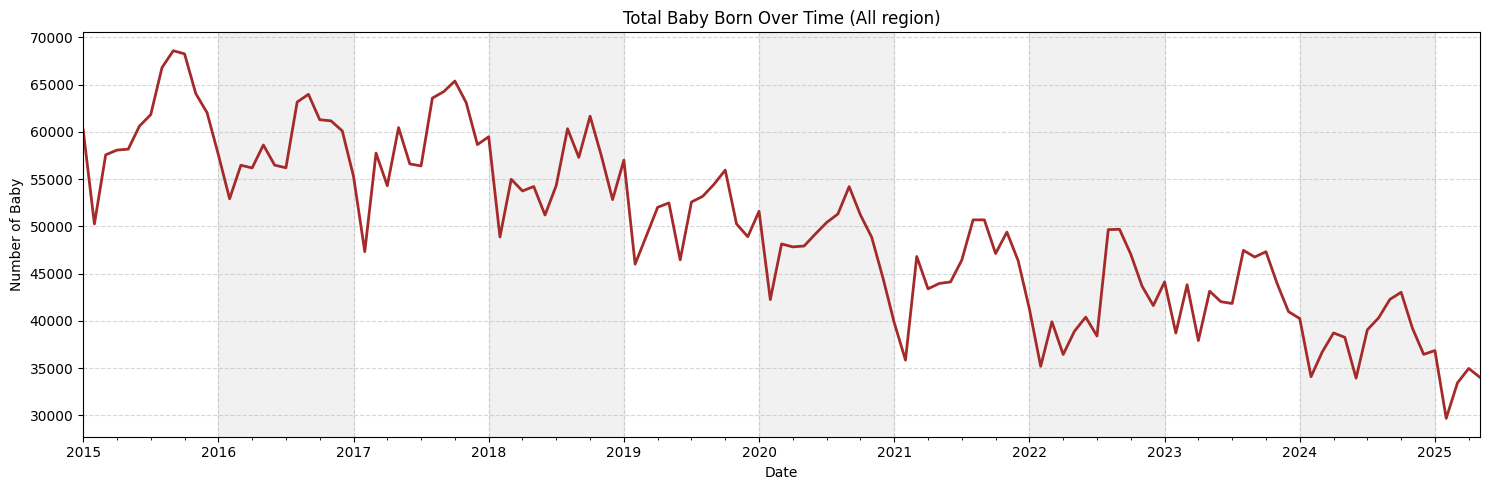

In [4]:
# Ensure Times is datetime
df_born_thai["Times"] = pd.to_datetime(df_born_thai["Times"])

# Group by Times and sum totals across all provinces
df_total_by_time = df_born_thai.groupby("Times")["total"].sum().reset_index()

# Plot
ax_baby = df_total_by_time.plot(
    x="Times", y="total", kind="line", figsize=(15, 5),
    title="Total Baby Born Over Time (All region)",
    xlabel="Date", ylabel="Number of Baby",
    color="brown", linewidth=2
)

# Optional: Add grid and highlight a key date
ax_baby.grid(True, linestyle="--", alpha=0.5)

# Loop through years 2015 to 2024
for year in range(2015, 2026):  # include 2025
    start = pd.Timestamp(f"{year}-01-01")
    end = pd.Timestamp(f"{year+1}-01-01")

    if year % 2 == 0:  # even years
        ax_baby.axvspan(start, end, color="lightgray", alpha=0.3)
# Create legend entries for the vertical lines
ax_baby.legend().set_visible(False)
plt.tight_layout()
# plt.savefig("Baby_Born_all_region.png",dpi=300,bbox_inches='tight')#Save figure
plt.show()

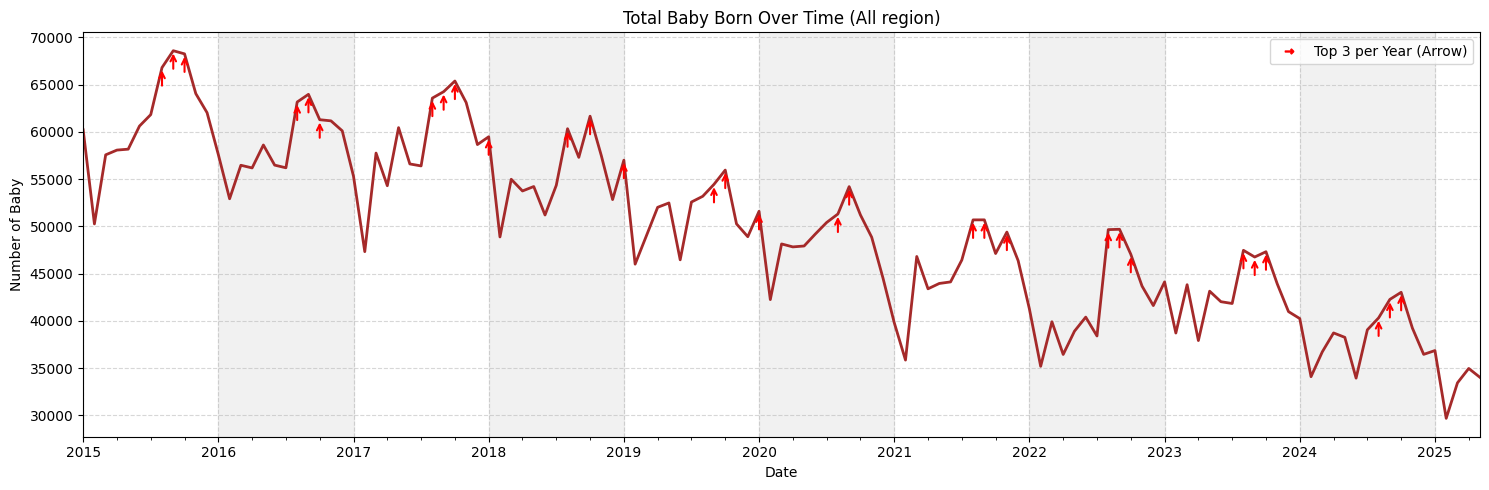

In [5]:
# Ensure Times is datetime
df_born_thai["Times"] = pd.to_datetime(df_born_thai["Times"])

# Group by Times and sum totals across all provinces
df_total_by_time = df_born_thai.groupby("Times")["total"].sum().reset_index()

# Plot
ax_baby_marker_top = df_total_by_time.plot(
    x="Times", y="total", kind="line", figsize=(15, 5),
    title="Total Baby Born Over Time (All region)",
    xlabel="Date", ylabel="Number of Baby",
    color="brown", linewidth=2
)

# Optional: Add grid and highlight a key date
ax_baby_marker_top.grid(True, linestyle="--", alpha=0.5)

# Loop through years 2015 to 2024
for year in range(2015, 2026):  # include 2025
    start = pd.Timestamp(f"{year}-01-01")
    end = pd.Timestamp(f"{year+1}-01-01")

    if year % 2 == 0:  # even years
        ax_baby_marker_top.axvspan(start, end, color="lightgray", alpha=0.3)
# Step: Annotate top 3 values per year (arrows only, skip 2025)
df_total_by_time["Year"] = df_total_by_time["Times"].dt.year

# Drop 'Year' before grouping to avoid warning
df_filtered = df_total_by_time[df_total_by_time["Year"] != 2025].drop(columns="Year")

top_points = (
    df_filtered
    .groupby(df_filtered["Times"].dt.year, group_keys=False)
    .apply(lambda g: g.nlargest(3, "total"))
    .reset_index(drop=True)
)

# Annotate each top point with arrow only
for _, row in top_points.iterrows():
    ax_baby_marker_top.annotate(
        "",  # no label text
        xy=(row["Times"], row["total"]),
        xytext=(0, -15),  # offset upward
        textcoords="offset points",
        ha="center", va="top",
        arrowprops=dict(arrowstyle="->", color="red", lw=1.5)
    )
# Create legend entries for the vertical lines
arrow_patch = mlines.Line2D([], [], color="red", marker=r'$\rightarrow$', linestyle="None", label="Top 3 per Year (Arrow)")
ax_baby_marker_top.legend(handles=[arrow_patch], loc="upper right")
plt.tight_layout()
# plt.savefig("Baby_Born_all_region_with_top_3_marker.png",dpi=300,bbox_inches='tight')#Save figure
plt.show()

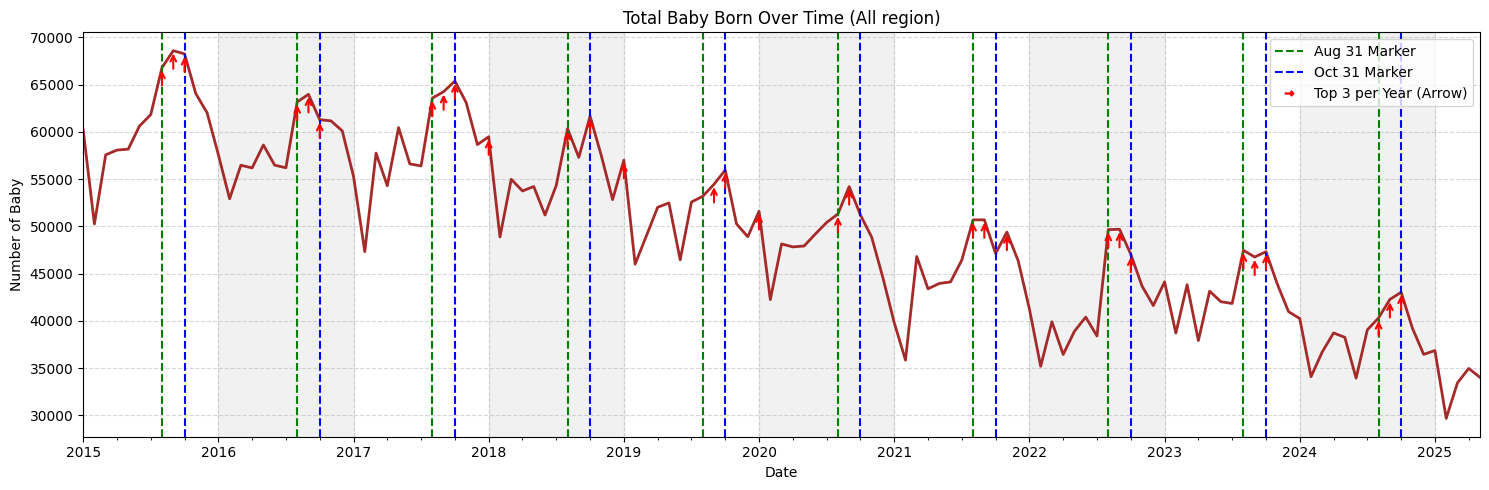

In [6]:
# Ensure Times is datetime
df_born_thai["Times"] = pd.to_datetime(df_born_thai["Times"])

# Group by Times and sum totals across all provinces
df_total_by_time = df_born_thai.groupby("Times")["total"].sum().reset_index()

# Plot
ax_baby_marker_all = df_total_by_time.plot(
    x="Times", y="total", kind="line", figsize=(15, 5),
    title="Total Baby Born Over Time (All region)",
    xlabel="Date", ylabel="Number of Baby",
    color="brown", linewidth=2
)

# Optional: Add grid and highlight a key date
ax_baby_marker_all.grid(True, linestyle="--", alpha=0.5)

# Loop through years 2015 to 2024
for year in range(2015, 2026):  # include 2025
    start = pd.Timestamp(f"{year}-01-01")
    end = pd.Timestamp(f"{year+1}-01-01")

    if year % 2 == 0:  # even years
        ax_baby_marker_all.axvspan(start, end, color="lightgray", alpha=0.3)
for year in range(2015, 2025):
    date_aug = pd.Timestamp(f"{year}-08-31")
    date_oct = pd.Timestamp(f"{year}-10-31")

    ax_baby_marker_all.axvline(date_aug, color="green", linestyle="dashed", linewidth=1.5)
    ax_baby_marker_all.axvline(date_oct, color="blue", linestyle="dashed", linewidth=1.5)
# Step: Annotate top 3 values per year (arrows only, skip 2025)
df_total_by_time["Year"] = df_total_by_time["Times"].dt.year

# Drop 'Year' before grouping to avoid warning
df_filtered = df_total_by_time[df_total_by_time["Year"] != 2025].drop(columns="Year")

top_points = (
    df_filtered
    .groupby(df_filtered["Times"].dt.year, group_keys=False)
    .apply(lambda g: g.nlargest(3, "total"))
    .reset_index(drop=True)
)

# Annotate each top point with arrow only
for _, row in top_points.iterrows():
    ax_baby_marker_all.annotate(
        "",  # no label text
        xy=(row["Times"], row["total"]),
        xytext=(0, -15),  # offset upward
        textcoords="offset points",
        ha="center", va="top",
        arrowprops=dict(arrowstyle="->", color="red", lw=1.5)
    )
# Create legend entries for the vertical lines
aug_patch = mlines.Line2D([], [], color="green", linestyle="dashed", linewidth=1.5, label="Aug 31 Marker")
oct_patch = mlines.Line2D([], [], color="blue", linestyle="dashed", linewidth=1.5, label="Oct 31 Marker")
arrow_patch = mlines.Line2D([], [], color="red", marker=r'$\rightarrow$', linestyle="None", label="Top 3 per Year (Arrow)")
ax_baby_marker_all.legend(handles=[aug_patch, oct_patch, arrow_patch], loc="upper right")
plt.tight_layout()
# plt.savefig("Baby_Born_all_region_with_all_marker.png",dpi=300,bbox_inches='tight')#Save figure
plt.show()

Cluster by Region (North,North_East,Central,East,South,West)

In [7]:
North = "เชียงราย น่าน พะเยา เชียงใหม่ แม่ฮ่องสอน แพร่ ลำปาง ลำพูน อุตรดิตถ์".split()
North_East = "หนองคาย นครพนม สกลนคร อุดรธานี หนองบัวลำภู เลย มุกดาหาร กาฬสินธุ์ ขอนแก่น อำนาจเจริญ ยโสธร ร้อยเอ็ด มหาสารคาม ชัยภูมิ นครราชสีมา บุรีรัมย์ สุรินทร์ ศรีสะเกษ อุบลราชธานี บึงกาฬ".split()
Central = "กรุงเทพมหานคร พิษณุโลก สุโขทัย เพชรบูรณ์ พิจิตร กำแพงเพชร นครสวรรค์ ลพบุรี ชัยนาท อุทัยธานี สิงห์บุรี อ่างทอง สระบุรี พระนครศรีอยุธยา สุพรรณบุรี นครนายก ปทุมธานี นนทบุรี นครปฐม สมุทรปราการ สมุทรสาคร สมุทรสงคราม".split()
East = "สระแก้ว ปราจีนบุรี ฉะเชิงเทรา ชลบุรี ระยอง จันทบุรี ตราด".split()
South = "ชุมพร ระนอง สุราษฎร์ธานี นครศรีธรรมราช กระบี่ พังงา ภูเก็ต พัทลุง ตรัง ปัตตานี สงขลา สตูล นราธิวาส ยะลา".split()
West = "ตาก กาญจนบุรี ราชบุรี เพชรบุรี ประจวบคีรีขันธ์".split()

df_born_thai["Times"] = pd.to_datetime(df_born_thai["Times"])

df_total_by_time_West = df_born_thai.query("provinceNameThai in @West").groupby("Times")["total"].sum().reset_index()
df_total_by_time_South = df_born_thai.query("provinceNameThai in @South").groupby("Times")["total"].sum().reset_index()
df_total_by_time_East = df_born_thai.query("provinceNameThai in @East").groupby("Times")["total"].sum().reset_index()
df_total_by_time_Central = df_born_thai.query("provinceNameThai in @Central").groupby("Times")["total"].sum().reset_index()
df_total_by_time_North_East = df_born_thai.query("provinceNameThai in @North_East").groupby("Times")["total"].sum().reset_index()
df_total_by_time_North = df_born_thai.query("provinceNameThai in @North").groupby("Times")["total"].sum().reset_index()

All Region

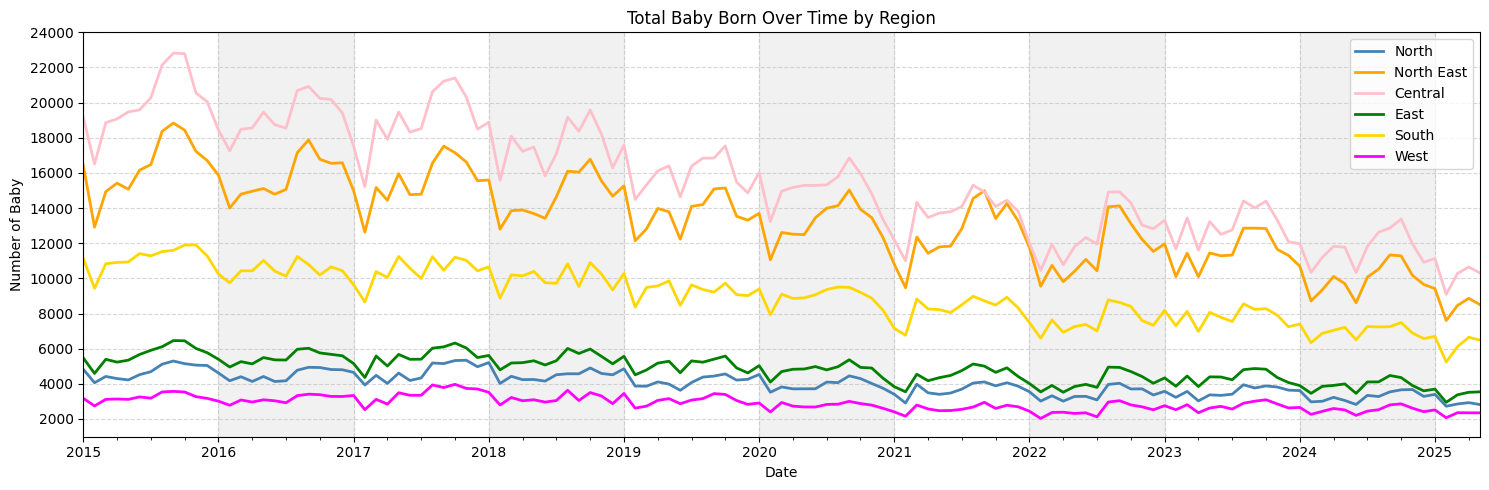

In [8]:
# Create a shared figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot each line on the same axis
df_total_by_time_North.plot(x="Times", y="total", ax=ax, label="North", color="steelblue", linewidth=2)
df_total_by_time_North_East.plot(x="Times", y="total", ax=ax, label="North East", color="orange", linewidth=2)
df_total_by_time_Central.plot(x="Times", y="total", ax=ax, label="Central", color="pink", linewidth=2)
df_total_by_time_East.plot(x="Times", y="total", ax=ax, label="East", color="green", linewidth=2)
df_total_by_time_South.plot(x="Times", y="total", ax=ax, label="South", color="gold", linewidth=2)
df_total_by_time_West.plot(x="Times", y="total", ax=ax, label="West", color="magenta", linewidth=2)
for year in range(2015, 2026):  # include 2025
    start = pd.Timestamp(f"{year}-01-01")
    end = pd.Timestamp(f"{year+1}-01-01")

    if year % 2 == 0:  # even years
        ax.axvspan(start, end, color="lightgray", alpha=0.3)
# Customize the plot        
ax.set_yticks(list(range(2000, 24001, 2000)))
ax.grid(True, linestyle="--", alpha=0.5)
ax.set_title("Total Baby Born Over Time by Region")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Baby")
ax.legend(loc="upper right")
plt.tight_layout()
# plt.savefig("Baby_Born_each_region.png",dpi=300,bbox_inches='tight')#Save figure
plt.show()

Region with North,East,West.

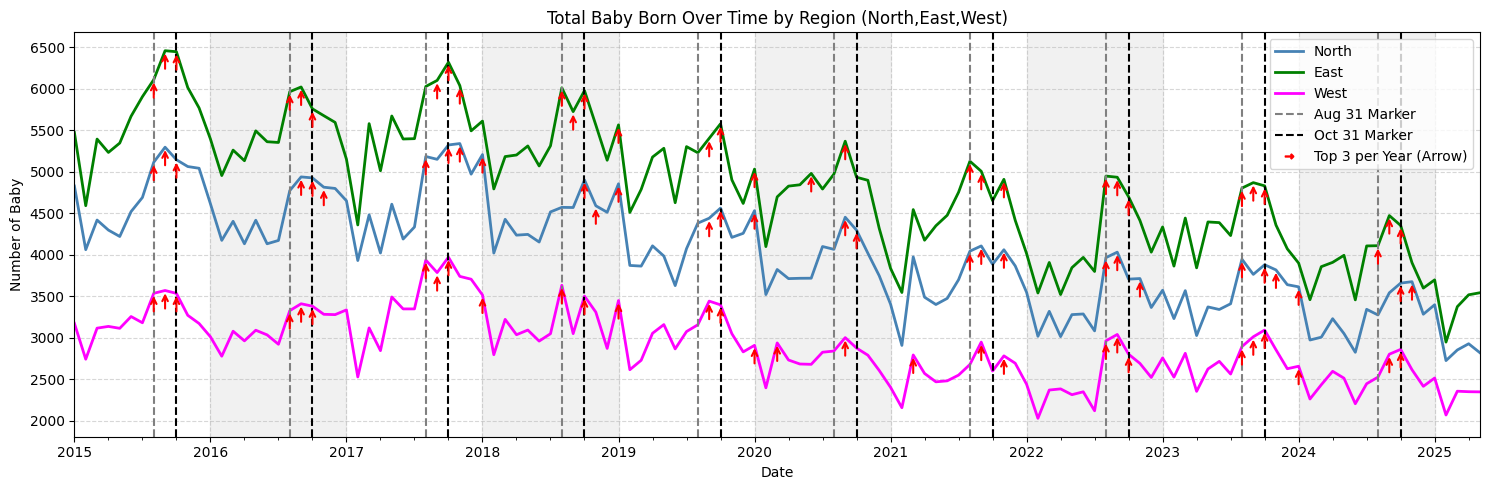

In [9]:
# Create a shared figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot each line on the same axis
df_total_by_time_North.plot(x="Times", y="total", ax=ax, label="North", color="steelblue", linewidth=2)
df_total_by_time_East.plot(x="Times", y="total", ax=ax, label="East", color="green", linewidth=2)
df_total_by_time_West.plot(x="Times", y="total", ax=ax, label="West", color="magenta", linewidth=2)

# Loop through years 2015 to 2024
for year in range(2015, 2026):  # include 2025
    start = pd.Timestamp(f"{year}-01-01")
    end = pd.Timestamp(f"{year+1}-01-01")

    if year % 2 == 0:  # even years
        ax.axvspan(start, end, color="lightgray", alpha=0.3)
for year in range(2015, 2025):
    date_aug = pd.Timestamp(f"{year}-08-31")
    date_oct = pd.Timestamp(f"{year}-10-31")

    ax.axvline(date_aug, color="gray", linestyle="dashed", linewidth=1.5)
    ax.axvline(date_oct, color="black", linestyle="dashed", linewidth=1.5)

# Create legend entries for the vertical lines
aug_patch = mlines.Line2D([], [], color="gray", linestyle="dashed", linewidth=1.5, label="Aug 31 Marker")
oct_patch = mlines.Line2D([], [], color="black", linestyle="dashed", linewidth=1.5, label="Oct 31 Marker")

# Step: Annotate top 3 values per year for each region (arrows only, skip 2025)
for df_region in [df_total_by_time_North, df_total_by_time_East, df_total_by_time_West]:
    df_region = df_region.copy()
    df_region["Year"] = df_region["Times"].dt.year

    df_filtered = df_region[df_region["Year"] != 2025].drop(columns="Year")

    top_points = (
        df_filtered
        .groupby(df_filtered["Times"].dt.year, group_keys=False)
        .apply(lambda g: g.nlargest(3, "total"))
        .reset_index(drop=True)
    )

    for _, row in top_points.iterrows():
        ax.annotate(
            "",  # no label text
            xy=(row["Times"], row["total"]),
            xytext=(0, -15),  # offset upward
            textcoords="offset points",
            ha="center", va="top",
            arrowprops=dict(arrowstyle="->", color="red", lw=1.5)
        )
# Add to legend
handles, labels = ax.get_legend_handles_labels()
handles.extend([aug_patch, oct_patch])
labels.extend(["Aug 31 Marker", "Oct 31 Marker"])
arrow_patch = mlines.Line2D([], [], color="red", marker=r'$\rightarrow$', linestyle="None", label="Top 3 per Year (Arrow)")
handles.append(arrow_patch)
labels.append("Top 3 per Year (Arrow)")
ax.legend(handles=handles, labels=labels, loc="upper right")
# Customize the plot
ax.set_yticks(list(range(2000, 6501, 500)))
ax.grid(True, linestyle="--", alpha=0.5)
ax.set_title("Total Baby Born Over Time by Region (North,East,West)")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Baby")
plt.tight_layout()
# plt.savefig("Baby_Born_North_East_West.png",dpi=300,bbox_inches='tight')#Save figure
plt.show()

Region with Central,North East,South.

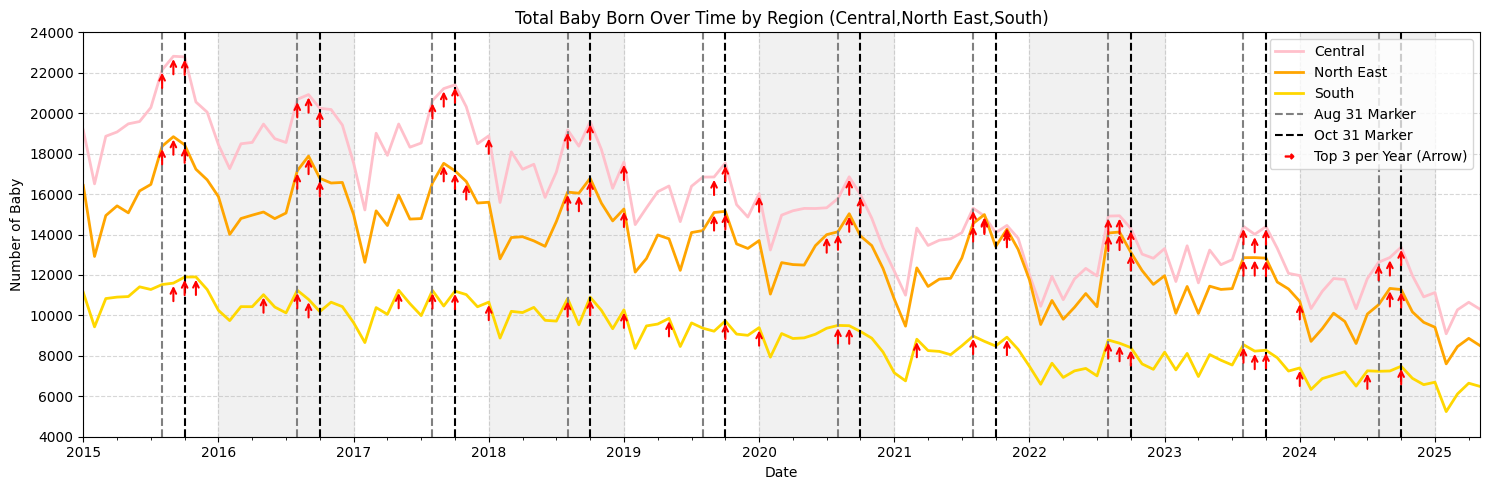

In [10]:
# Create a shared figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot each line on the same axis
df_total_by_time_Central.plot(x="Times", y="total", ax=ax, label="Central", color="pink", linewidth=2)
df_total_by_time_North_East.plot(x="Times", y="total", ax=ax, label="North East", color="orange", linewidth=2)
df_total_by_time_South.plot(x="Times", y="total", ax=ax, label="South", color="gold", linewidth=2)

# Loop through years 2015 to 2024
for year in range(2015, 2026):  # include 2025
    start = pd.Timestamp(f"{year}-01-01")
    end = pd.Timestamp(f"{year+1}-01-01")

    if year % 2 == 0:  # even years
        ax.axvspan(start, end, color="lightgray", alpha=0.3)
for year in range(2015, 2025):
    date_aug = pd.Timestamp(f"{year}-08-31")
    date_oct = pd.Timestamp(f"{year}-10-31")

    ax.axvline(date_aug, color="gray", linestyle="dashed", linewidth=1.5)
    ax.axvline(date_oct, color="black", linestyle="dashed", linewidth=1.5)

# Create legend entries for the vertical lines
aug_patch = mlines.Line2D([], [], color="gray", linestyle="dashed", linewidth=1.5, label="Aug 31 Marker")
oct_patch = mlines.Line2D([], [], color="black", linestyle="dashed", linewidth=1.5, label="Oct 31 Marker")

# Step: Annotate top 3 values per year for each region (arrows only, skip 2025)
for df_region in [df_total_by_time_Central, df_total_by_time_North_East, df_total_by_time_South]:
    df_region = df_region.copy()
    df_region["Year"] = df_region["Times"].dt.year

    df_filtered = df_region[df_region["Year"] != 2025].drop(columns="Year")

    top_points = (
        df_filtered
        .groupby(df_filtered["Times"].dt.year, group_keys=False)
        .apply(lambda g: g.nlargest(3, "total"))
        .reset_index(drop=True)
    )

    for _, row in top_points.iterrows():
        ax.annotate(
            "",  # no label text
            xy=(row["Times"], row["total"]),
            xytext=(0, -15),  # offset upward
            textcoords="offset points",
            ha="center", va="top",
            arrowprops=dict(arrowstyle="->", color="red", lw=1.5)
        )
# Add to legend
handles, labels = ax.get_legend_handles_labels()
handles.extend([aug_patch, oct_patch])
labels.extend(["Aug 31 Marker", "Oct 31 Marker"])
arrow_patch = mlines.Line2D([], [], color="red", marker=r'$\rightarrow$', linestyle="None", label="Top 3 per Year (Arrow)")
handles.append(arrow_patch)
labels.append("Top 3 per Year (Arrow)")
ax.legend(handles=handles, labels=labels, loc="upper right")
# Customize the plot
ax.set_yticks(list(range(4000, 24001, 2000)))
ax.grid(True, linestyle="--", alpha=0.5)
ax.set_title("Total Baby Born Over Time by Region (Central,North East,South)")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Baby")
plt.tight_layout()
# plt.savefig("Baby_Born_Central_NorthEast_South.png",dpi=300,bbox_inches='tight')#Save figure
plt.show()

Trend of Baby Born Per Year in Thailand

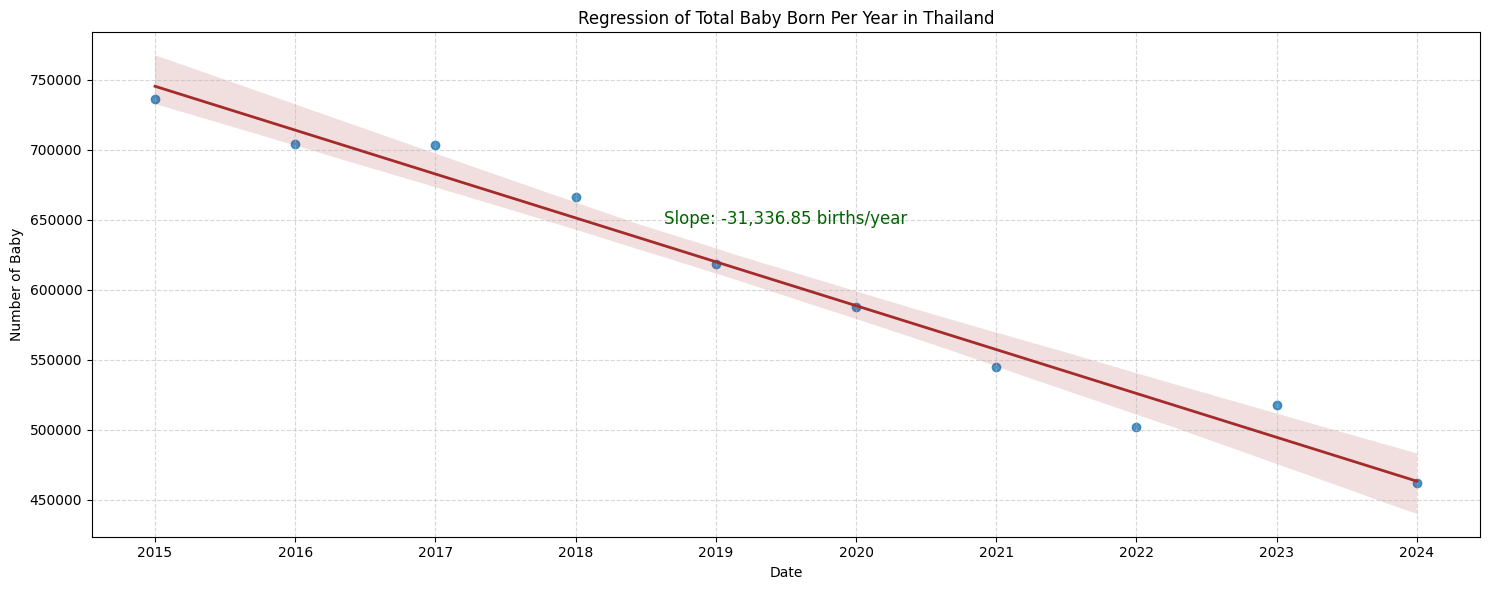

In [11]:
df_born_thai["Year"] = df_born_thai["Times"].dt.year
# Step 1: Prepare data
df_yearly = df_born_thai.query("Year != 2025").groupby("Year")["total"].sum().reset_index()

# Step 2: Fit regression using numpy
x = df_yearly["Year"].values
y = df_yearly["total"].values
slope, intercept = np.polyfit(x, y, 1)

# Step 3: Plot regression
plt.figure(figsize=(15, 6))
sns.regplot(x=x, y=y, scatter=True, line_kws={"color": "brown", "linewidth": 2})

# Step 4: Annotate slope
mid_x = np.median(x)
mid_y = slope * mid_x + intercept
plt.text(mid_x, mid_y + 40000,  # slight upward offset
         f"Slope: {slope:,.2f} births/year",
         ha="center", va="bottom", fontsize=12, color="darkgreen")
xticks = x
xtick_labels = df_yearly["Year"].astype(str)
plt.xticks(ticks=xticks, labels=xtick_labels, rotation=0)
# Step 5: Final touches
plt.title("Regression of Total Baby Born Per Year in Thailand")
plt.xlabel("Date")
plt.ylabel("Number of Baby")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
# plt.savefig("Baby_Born_Trend.png",dpi=300,bbox_inches='tight')#Save figure
plt.show()

## People in Thai

In [12]:
df_people_thai

,Age,male,female,male(not Thai),female(not Thai),Times,total (Thai),total (not Thai),total
0,0,361751,341173,19214,18148,2015-05-31,702924,37362,740286
1,1,375332,353923,17954,16998,2015-05-31,729255,34952,764207
2,2,406329,382873,14284,13178,2015-05-31,789202,27462,816664
3,3,411107,387323,8525,7851,2015-05-31,798430,16376,814806
4,4,386174,365656,5027,4742,2015-05-31,751830,9769,761599
...,...,...,...,...,...,...,...,...,...
2137,97,6261,9481,493,226,2025-05-31,15742,719,16461
2138,98,4591,6524,380,230,2025-05-31,11115,610,11725
2139,99,4140,5303,341,183,2025-05-31,9443,524,9967
2140,100,3065,3550,336,159,2025-05-31,6615,495,7110


In [13]:
#Merge step
df_people_thai_pie_under = pd.DataFrame(df_people_thai.query("Age < 60").groupby(by="Times")["total"].sum()).rename(columns={"total": "under 60"}, inplace=False)
df_people_thai_pie_upper = pd.DataFrame(df_people_thai.query("Age >= 60").groupby(by="Times")["total"].sum()).rename(columns={"total": "60 +"}, inplace=False)
df_people_thai_pie = pd.merge(df_people_thai_pie_under, df_people_thai_pie_upper, on="Times", how='inner')
#Merge step

Ratio of "Age under 60" and "60+" at 2015 in Thailand

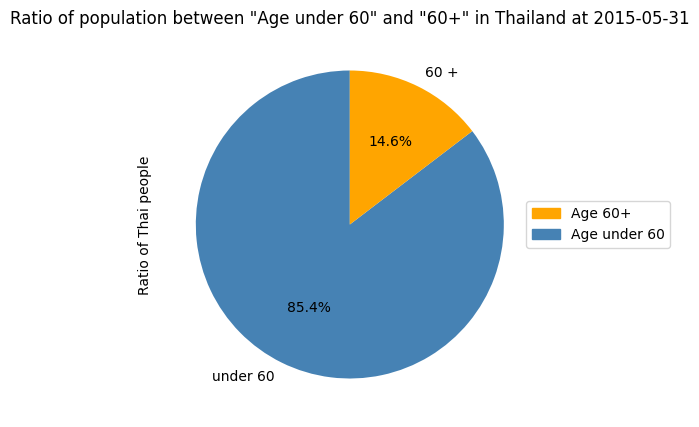

In [14]:
# Create a figure manually
fig, ax = plt.subplots(figsize=(15, 5))

# Plot pie chart on the axis
ax_pie_dri = df_people_thai_pie.query("Times =='2015-05-31'").loc["2015-05-31"].plot.pie(
    ax=ax,
    autopct="%1.1f%%",
    startangle=90,
    labels=df_people_thai_pie.columns,
    colors=["steelblue", "orange"]
)

# Add legend
blue_patch = mpatches.Patch(color='steelblue', label='Age under 60')
orange_patch = mpatches.Patch(color='orange', label='Age 60+')
ax.legend(handles=[orange_patch, blue_patch], loc='center right', bbox_to_anchor=(1.35, 0.5))

# Add title and label
ax.set_title('Ratio of population between "Age under 60" and "60+" in Thailand at 2015-05-31')
ax.set_ylabel('Ratio of Thai people')

# plt.savefig("Ratio_Age_under_60_and_60_at_2015.png", dpi=300, bbox_inches='tight')#Save figure
plt.show()

Ratio of "Age under 60" and "60+" at 2025 in Thailand

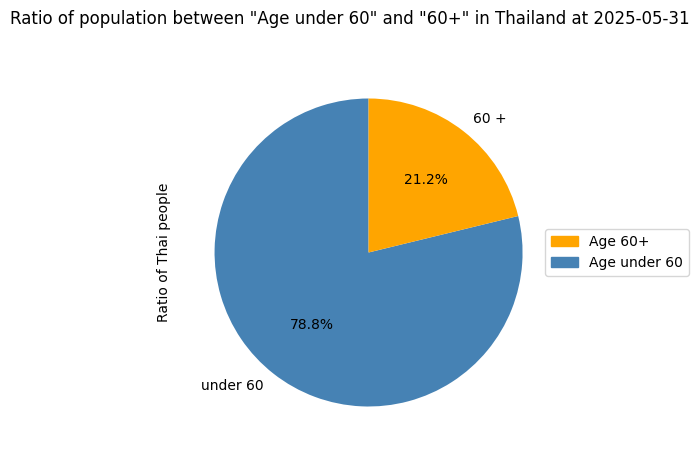

In [15]:
# Plot pie chart
ax_pie = df_people_thai_pie.query("Times =='2025-05-31'").loc["2025-05-31"].plot.pie(
    autopct="%1.1f%%",
    startangle=90,
    labels=df_people_thai_pie.columns,
    title='Ratio of population between "Age under 60" and "60+" in Thailand at 2025-05-31',
    ylabel='Ratio of Thai people',
    subplots=True,
    figsize=(15, 5),
    colors=["steelblue", "orange"]
)

# Add legend
blue_patch = mpatches.Patch(color='steelblue', label='Age under 60')
orange_patch = mpatches.Patch(color='orange', label='Age 60+')
ax_pie[0].legend(handles=[orange_patch, blue_patch], loc='center right', bbox_to_anchor=(1.35, 0.5))

# plt.savefig("Ratio_Age_under_60_and_60_at_2025.png", dpi=300, bbox_inches='tight')#Save figure
plt.show()

Distribution of population in Thailand 2025-05-31

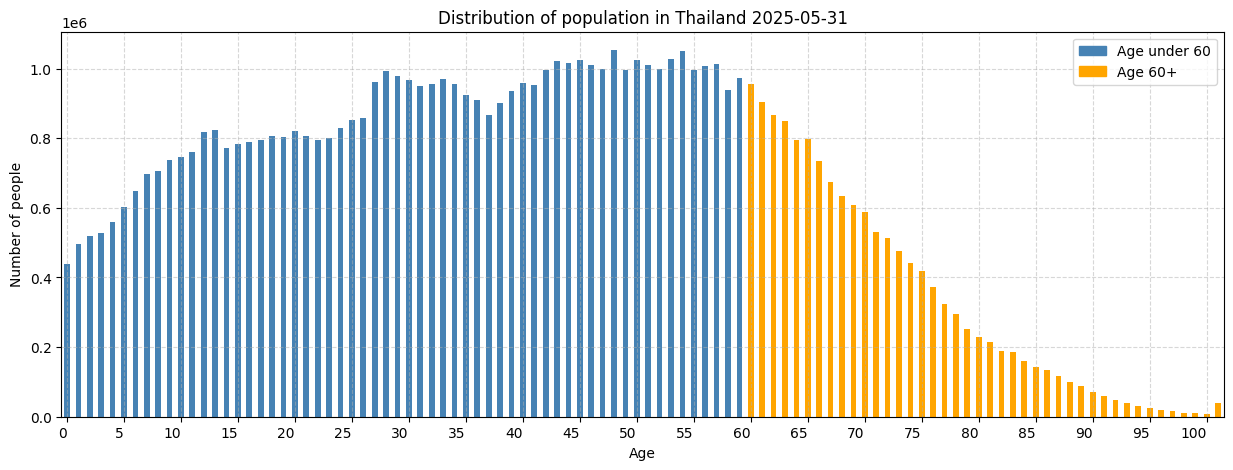

In [16]:
colors = np.where(df_people_thai["Age"] >= 60, "orange", "steelblue")
blue_patch = mpatches.Patch(color='steelblue', label='Age under 60')
orange_patch = mpatches.Patch(color='orange', label='Age 60+')
ax = df_people_thai.query( "Times == '2025-05-31'" )[["Age","total"]].plot( x="Age",
                                                                           y="total",
                                                                           kind='bar',
                                                                           title='Distribution of population in Thailand 2025-05-31',
                                                                           ylabel='Number of people',
                                                                           subplots=False,
                                                                           figsize=(15,5),
                                                                           color=colors)
xticks = ax.get_xticks()[::5]
ax.set_xticks(xticks)
ax.set_xticklabels([str(int(t)) for t in xticks], rotation=0, ha='right')
ax.legend(handles=[blue_patch, orange_patch])
ax.grid(True, linestyle="--", alpha=0.5)
fig = ax.get_figure()
# fig.savefig("population_distribution_2025.png", dpi=300, bbox_inches='tight')#Save figure

## Urinary Incontinence of Elderly People

In [17]:
df_part_of_old_thai

,60-69,70-79,80+,male,female,Times,total
0,819936,784305,578003,806338,1375906,2014-12-31,10014705
1,664376,748328,583443,696662,1299484,2017-12-31,11312447
2,618675,814349,698389,749805,1381608,2021-12-31,13358751
3,496179,709547,550273,565099,1190900,2024-12-31,14027411


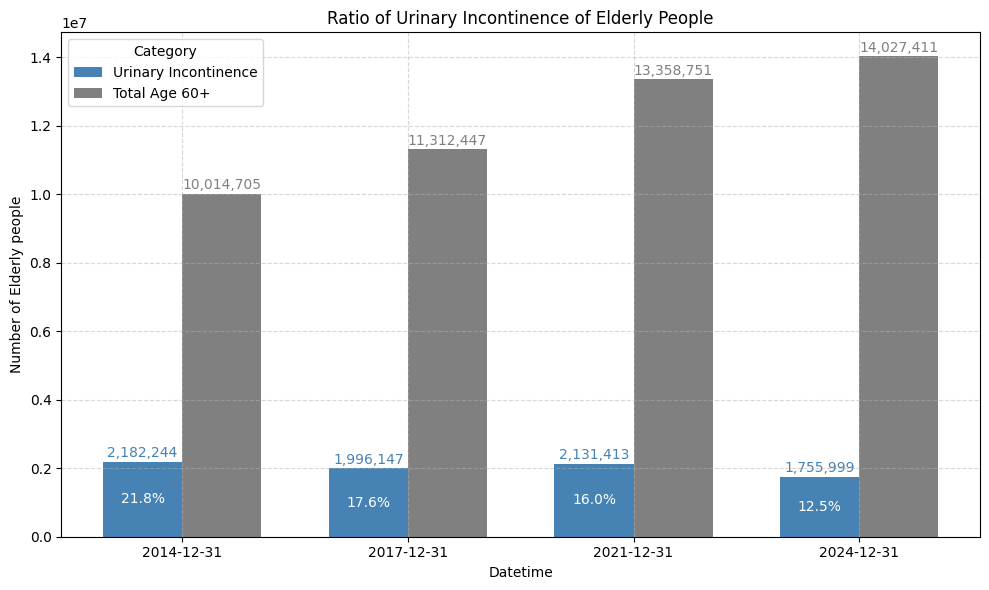

In [18]:
df_plot = df_part_of_old_thai.copy()
df_plot["elderly_sum"] = df_plot["60-69"] + df_plot["70-79"] + df_plot["80+"]
df_bar = df_plot[["Times", "elderly_sum", "total"]]

# Step 2: Plot setup
x = np.arange(len(df_bar))  # group positions
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Step 3: Plot bars
bars_elderly = ax.bar(x, df_bar["elderly_sum"], width=width, label="Urinary Incontinence", color="steelblue")
bars_total = ax.bar(x + width, df_bar["total"], width=width, label="Total Age 60+", color="gray")

# Step 4: Add annotations
for i in range(len(df_bar)):
    elderly_val = df_bar["elderly_sum"].iloc[i]
    total_val = df_bar["total"].iloc[i]
    ratio = elderly_val / total_val * 100

    # Inside elderly bar: ratio
    ax.text(x[i], elderly_val * 0.5,
            f"{ratio:.1f}%",
            ha="center", va="center", fontsize=10, color="white")

    # Above elderly bar: number
    ax.text(x[i], elderly_val + 50000,
            f"{elderly_val:,}",
            ha="center", va="bottom", fontsize=10, color="steelblue")

    # Above total bar: number
    ax.text(x[i] + width, total_val + 50000,
            f"{total_val:,}",
            ha="center", va="bottom", fontsize=10, color="gray")

# Step 5: Format plot
ax.set_xticks(x + width / 2)
ax.set_xticklabels(df_bar["Times"], rotation=0)
ax.set_ylabel("Number of Elderly people")
ax.set_xlabel("Datetime")
ax.set_title("Ratio of Urinary Incontinence of Elderly People")
ax.legend(title="Category")
ax.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
# plt.savefig("Ratio_Urinary_Incontinence_Elderly.png",dpi=300,bbox_inches='tight')#Save figure
plt.show()

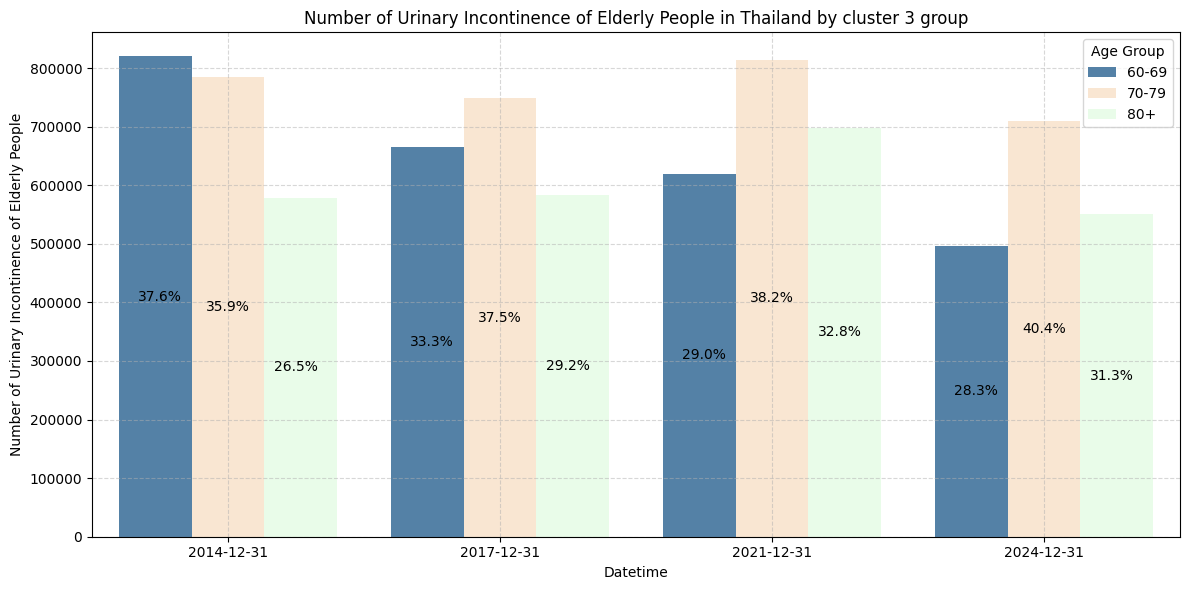

In [19]:
# Step 1: Prepare data
cols_to_plot = ["60-69", "70-79", "80+"]
df_plot = df_part_of_old_thai[["Times"] + cols_to_plot].copy()

# Calculate elderly_sum for each row
df_plot["elderly_sum"] = df_plot[cols_to_plot].sum(axis=1)

# Melt for plotting
df_melted = df_plot.melt(id_vars=["Times", "elderly_sum"],
                         value_vars=cols_to_plot,
                         var_name="Age Group", value_name="Population")

# Step 2: Plot setup
plt.figure(figsize=(12, 6))
palette = {
    "60-69": "steelblue",                      # strong primary bar
    "70-79": (1.0, 0.9, 0.8, 1),             # soft orange tint, nearly white
    "80+":   (0.9, 1.0, 0.9, 1)              # soft green tint, nearly white
}
ax = sns.barplot(data=df_melted, x="Times", y="Population", hue="Age Group", palette=palette)

# Step 3: Add ratio annotations inside each bar
for i, row in df_plot.iterrows():
    total_elderly = row["elderly_sum"]
    times = row["Times"]

    for age_group in cols_to_plot:
        value = row[age_group]
        ratio = value / total_elderly * 100

        # Find matching bar in melted data
        match = df_melted[(df_melted["Times"] == times) & (df_melted["Age Group"] == age_group)]
        if not match.empty:
            xpos = list(df_melted["Times"].unique()).index(times)
            offset = {"60-69": -0.25, "70-79": 0, "80+": 0.25}[age_group]
            ax.text(xpos + offset, value * 0.5,
                    f"{ratio:.1f}%",
                    ha="center", va="center", fontsize=10, color="black")

# Step 4: Final touches
ax.grid(True, linestyle="--", alpha=0.5)
plt.title("Number of Urinary Incontinence of Elderly People in Thailand by cluster 3 group")
plt.xlabel("Datetime")
plt.ylabel("Number of Urinary Incontinence of Elderly People")
plt.xticks(rotation=0)
plt.legend(title="Age Group")
plt.tight_layout()
# plt.savefig("Urinary_Incontinence_Elderly_with_cluster.png",dpi=300,bbox_inches='tight')#Save figure
plt.show()

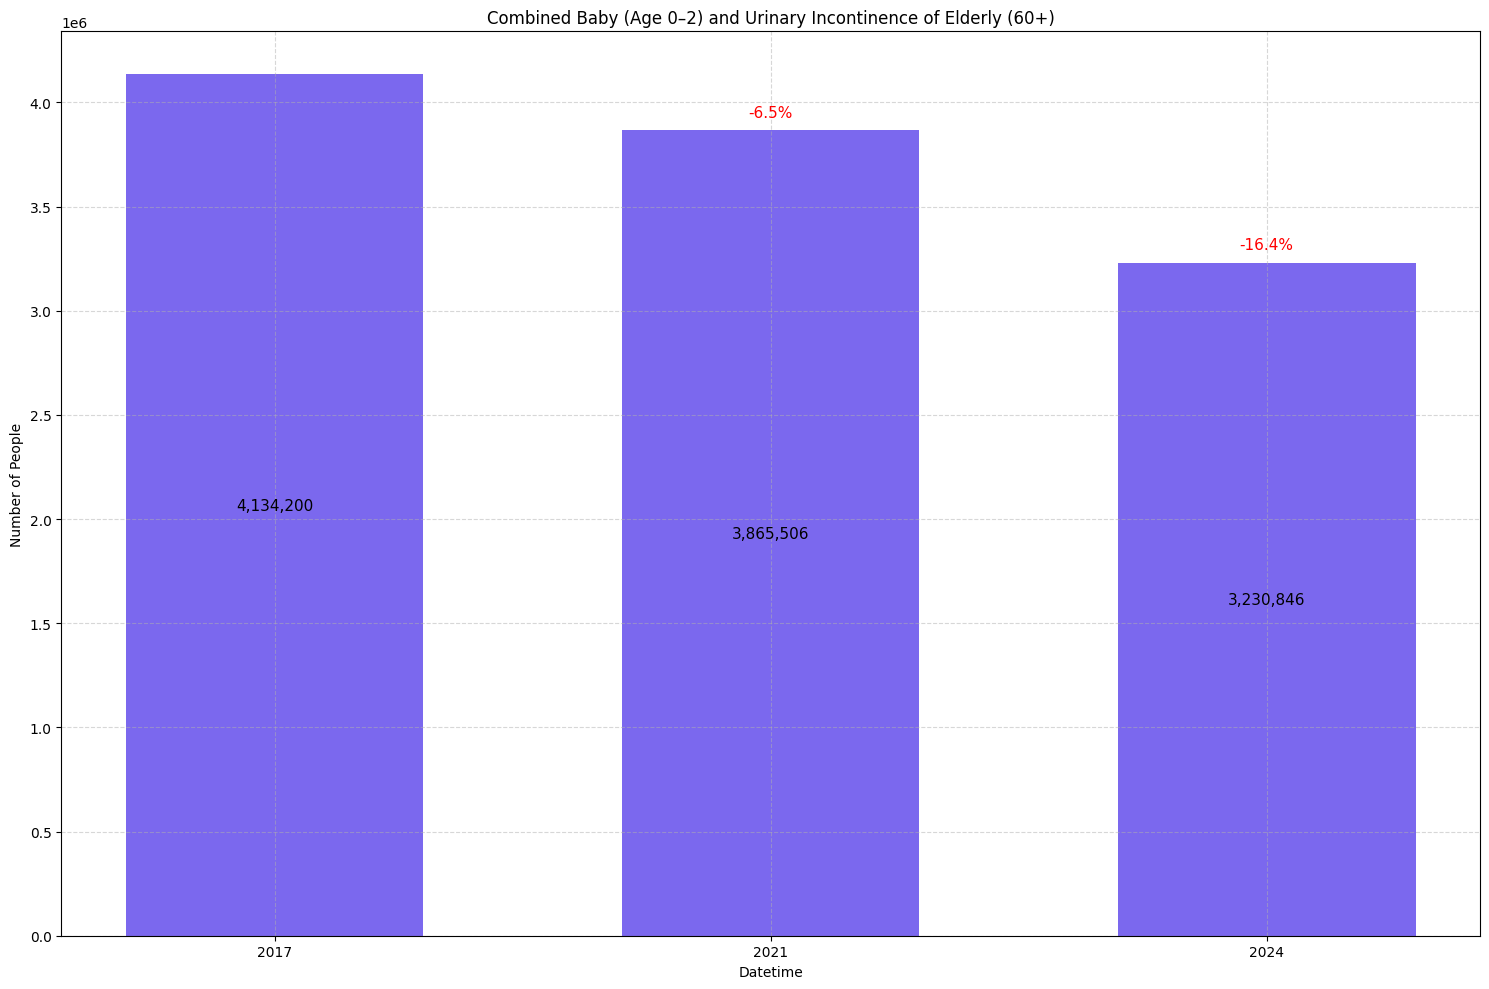

In [20]:
# Step 1: Define target years
target_times = ['2017-12-31', '2021-12-31', '2024-12-31']

# Step 2: Baby data from df_people_thai
baby_counts = []
for date in target_times:
    baby_sum = df_people_thai.query(f"Times == '{date}' and Age >= 0 and Age < 3")["total"].sum()
    baby_counts.append(baby_sum)

# Step 3: Elderly data from df_part_of_old_thai
elderly_counts = []

for date in target_times:
    row = df_part_of_old_thai[df_part_of_old_thai["Times"] == date]
    elderly_sum = row[["60-69", "70-79", "80+"]].sum(axis=1).values[0]
    elderly_counts.append(elderly_sum)
# Step 4: combined of Both
combined_counts = [baby + elderly for baby, elderly in zip(baby_counts, elderly_counts)]
x = np.arange(len(target_times))
fig, ax = plt.subplots(figsize=(15, 10))

# Plot single bar per year
bars = ax.bar(x, combined_counts, width=0.6, color="mediumslateblue")

# Add annotations inside each bar
for i in range(len(target_times)):
    ax.text(x[i], combined_counts[i] * 0.5,
            f"{combined_counts[i]:,}",
            ha="center", va="center", fontsize=11, color="black")
# Calculate change annotations
change_2021 = -(1 - combined_counts[1] / combined_counts[0]) * 100
change_2024 = -(1 - combined_counts[2] / combined_counts[1]) * 100 

# Set colors based on sign
color_2021 = "green" if change_2021 >= 0 else "red"
color_2024 = "green" if change_2024 >= 0 else "red"

# Add annotations above 2021 and 2024 bars
ax.text(x[1], combined_counts[1] + 50000,
        f"{change_2021:.1f}%", ha="center", va="bottom",
        fontsize=11, color=color_2021)

ax.text(x[2], combined_counts[2] + 50000,
        f"{change_2024:.1f}%", ha="center", va="bottom",
        fontsize=11, color=color_2024)
# Format
ax.set_xticks(x)
ax.set_xticklabels([t[:4] for t in target_times])  # Show just the year
ax.set_ylabel("Number of People")
ax.set_xlabel("Datetime")
ax.set_title("Combined Baby (Age 0–2) and Urinary Incontinence of Elderly (60+)")
ax.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
# plt.savefig("Baby_0_to_2_and_Urinary_Incontinence_of_Elderly.png",dpi=300,bbox_inches='tight')#Save figure
plt.show()

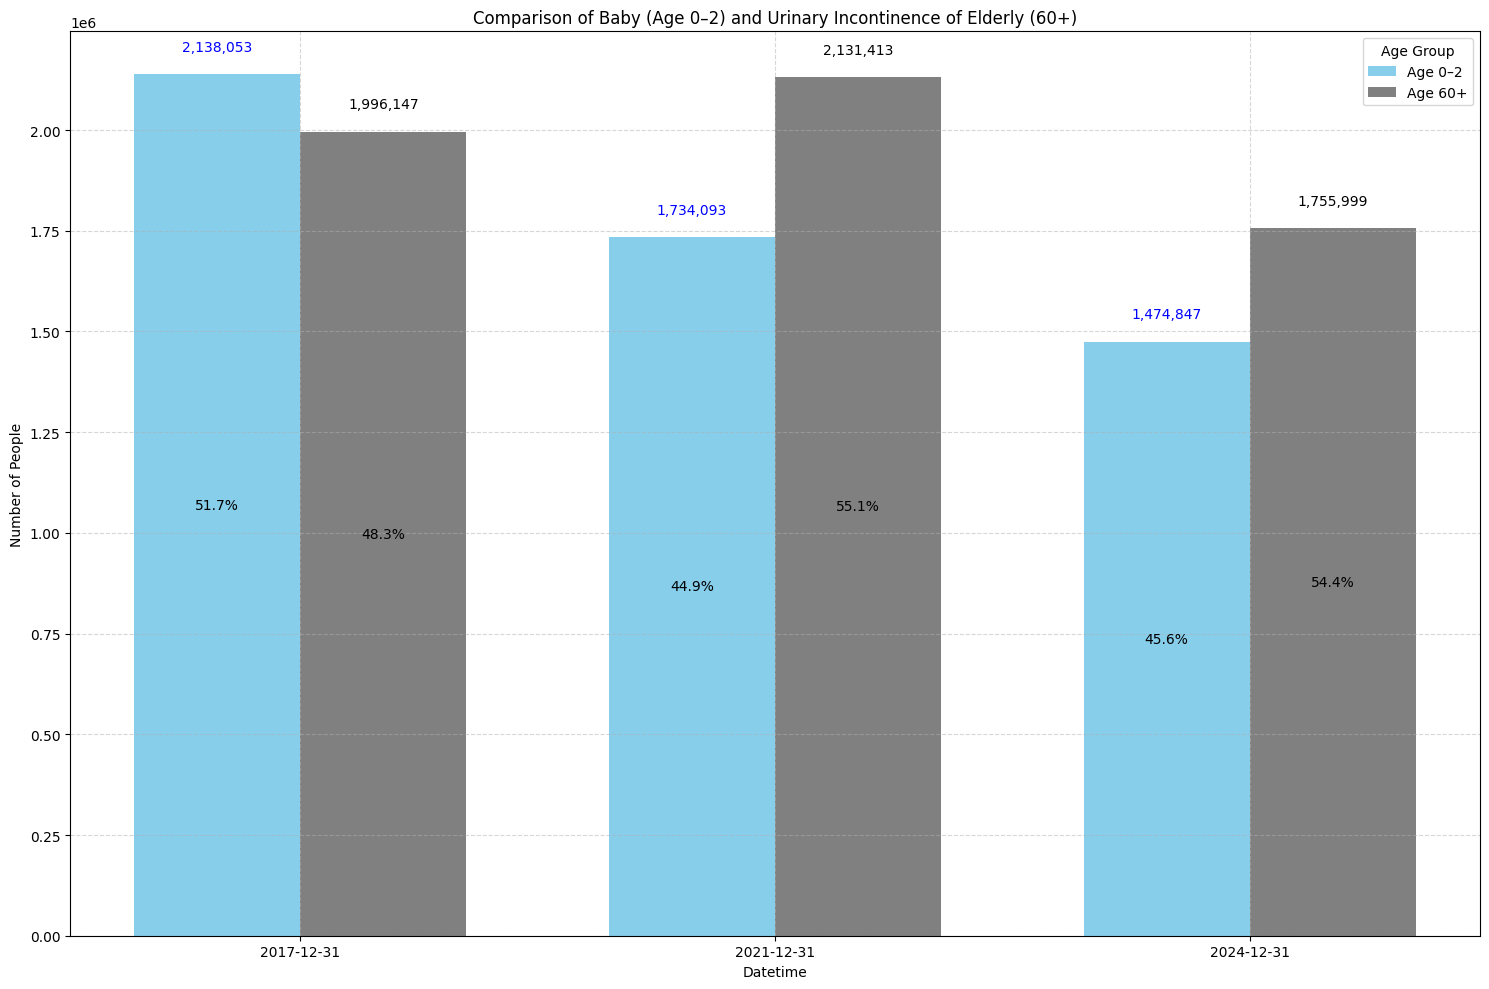

In [21]:
# Step 1: Define target years
target_times = ['2017-12-31', '2021-12-31', '2024-12-31']

# Step 2: Baby data from df_people_thai
baby_counts = []
for date in target_times:
    baby_sum = df_people_thai.query(f"Times == '{date}' and Age >= 0 and Age < 3")["total"].sum()
    baby_counts.append(baby_sum)

# Step 3: Elderly data from df_part_of_old_thai
elderly_counts = []

for date in target_times:
    row = df_part_of_old_thai[df_part_of_old_thai["Times"] == date]
    elderly_sum = row[["60-69", "70-79", "80+"]].sum(axis=1).values[0]
    elderly_counts.append(elderly_sum)

# Step 4: Plot grouped bar chart
x = np.arange(len(target_times))
width = 0.35

fig, ax = plt.subplots(figsize=(15, 10))
bars_baby = ax.bar(x, baby_counts, width=width, label="Age 0–2", color="skyblue")
bars_elderly = ax.bar(x + width, elderly_counts, width=width, label="Age 60+", color="gray")

# Step 5: Add annotations
for i in range(len(target_times)):
    ax.text(x[i], baby_counts[i] + 50000, f"{baby_counts[i]:,}", ha="center", va="bottom", fontsize=10, color="blue")
    ax.text(x[i] + width, elderly_counts[i] + 50000, f"{elderly_counts[i]:,}", ha="center", va="bottom", fontsize=10, color="black")
for i in range(len(target_times)):
    baby = baby_counts[i]
    elderly = elderly_counts[i]
    total = baby + elderly

    # Ratio inside baby bar
    baby_ratio = baby / total * 100
    ax.text(x[i], baby * 0.5,
            f"{baby_ratio:.1f}%",
            ha="center", va="center", fontsize=10, color="black")

    # Ratio inside elderly bar
    elderly_ratio = elderly / total * 100
    ax.text(x[i] + width, elderly * 0.5,
            f"{elderly_ratio:.1f}%",
            ha="center", va="center", fontsize=10, color="black")
# Step 6: Format
ax.set_xticks(x + width / 2)
ax.set_xticklabels(target_times, rotation=0)
ax.set_ylabel("Number of People")
ax.set_xlabel("Datetime")
ax.set_title("Comparison of Baby (Age 0–2) and Urinary Incontinence of Elderly (60+)")
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend(title="Age Group")
plt.tight_layout()
# plt.savefig("Ratio_between_Baby_0_to_2_and_Urinary_Incontinence_of_Elderly.png",dpi=300,bbox_inches='tight')#Save figure
plt.show()

## Pet in Thai (dog and cat)

In [22]:
df_dog_cat_thai

,Times,dog,cat
0,31-05-2022,3241290,1437263
1,31-12-2022,2426661,1098534
2,31-05-2023,3180962,1537122
3,31-12-2023,3180487,1541702
4,31-05-2024,3778744,1978988
5,31-12-2024,3336467,1746772
6,31-05-2025,4207416,2380150


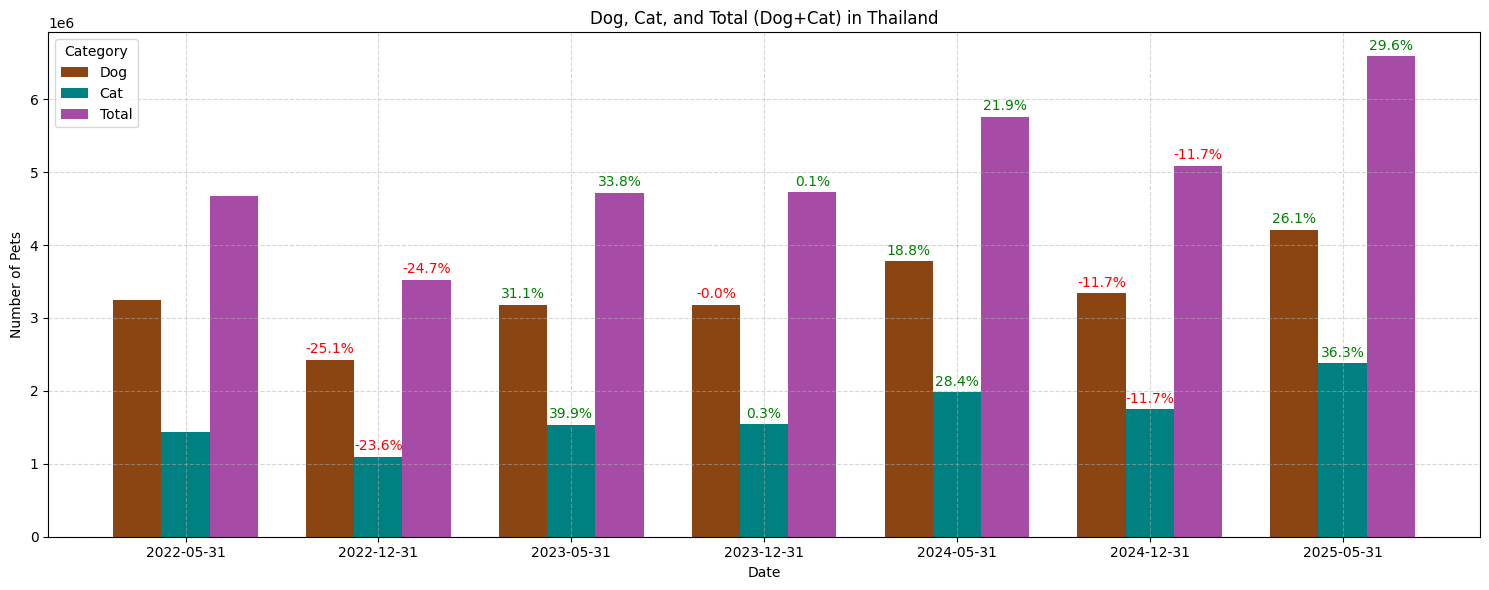

In [23]:
df_dog_cat_thai["total"] = df_dog_cat_thai["dog"] + df_dog_cat_thai["cat"]
# Step 1: Ensure Times is datetime
df_dog_cat_thai["Times"] = pd.to_datetime(df_dog_cat_thai["Times"], format="%d-%m-%Y")

# Step 2: Prepare positions
x = np.arange(len(df_dog_cat_thai))  # one group per date
width = 0.25  # width of each bar

# Step 3: Plot grouped bars
fig, ax = plt.subplots(figsize=(15, 6))

bars_dog = ax.bar(x - width, df_dog_cat_thai["dog"], width=width, label="Dog", color="saddlebrown")
bars_cat = ax.bar(x, df_dog_cat_thai["cat"], width=width, label="Cat", color="teal")
bars_total = ax.bar(x + width, df_dog_cat_thai["total"], width=width, label="Total", color="purple", alpha=0.7)

# Step: Annotate percentage change for each category
for i in range(1, len(df_dog_cat_thai)):
    for j, col in enumerate(["dog", "cat", "total"]):
        prev = df_dog_cat_thai[col].iloc[i - 1]
        curr = df_dog_cat_thai[col].iloc[i]
        change = ((curr - prev) / prev) * 100
        color = "green" if change >= 0 else "red"

        # Position: x[i] + offset based on bar group
        offset = [-width, 0, width][j]
        ax.text(x[i] + offset, curr + 50000,
                f"{change:.1f}%", ha="center", va="bottom",
                fontsize=10, color=color)
# Step 4: Format
ax.set_xticks(x)
ax.set_xticklabels(df_dog_cat_thai["Times"].dt.strftime("%Y-%m-%d"), rotation=0)
ax.set_ylabel("Number of Pets")
ax.set_xlabel("Date")
ax.set_title("Dog, Cat, and Total (Dog+Cat) in Thailand")
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend(title="Category")
plt.tight_layout()
# plt.savefig("Number_of_Dog_Cat.png",dpi=300,bbox_inches='tight')#Save figure
plt.show()

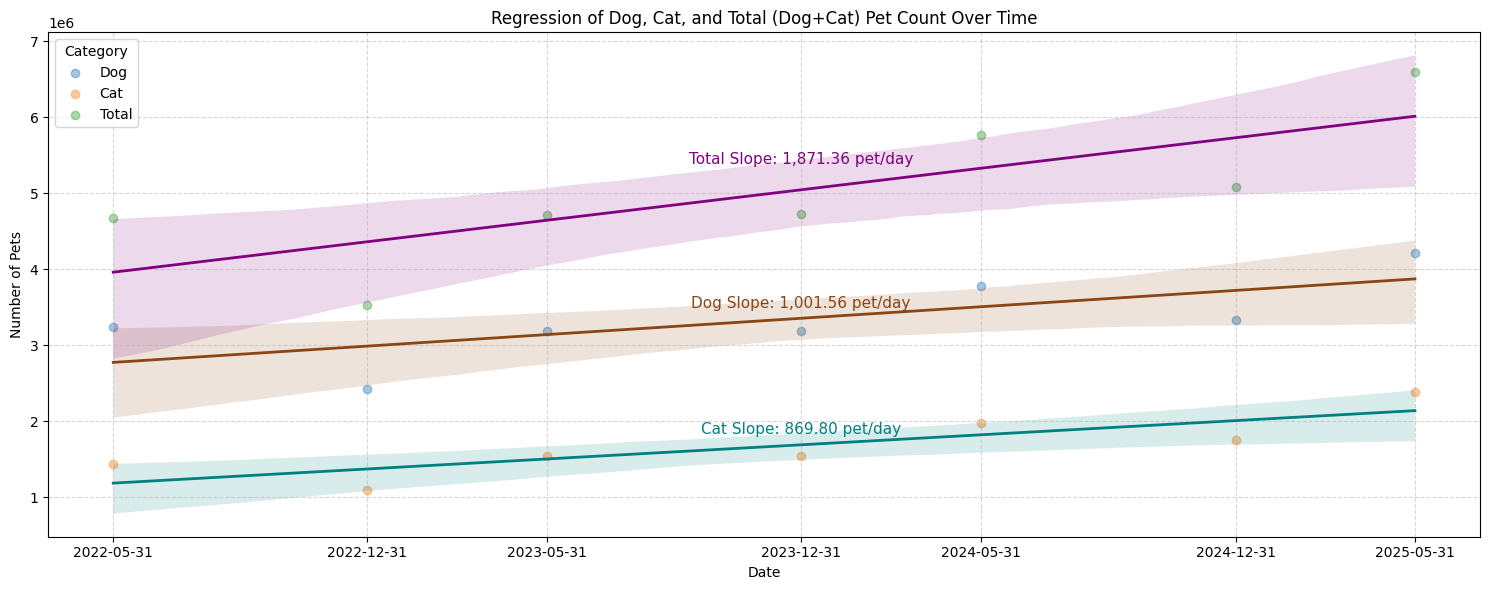

In [24]:
df_dog_cat_thai["total"] = df_dog_cat_thai["dog"] + df_dog_cat_thai["cat"]
# Step 1: Ensure datetime format and ordinal conversion
df_dog_cat_thai["Times"] = pd.to_datetime(df_dog_cat_thai["Times"], format="%d-%m-%Y")
df_dog_cat_thai["ordinal"] = df_dog_cat_thai["Times"].map(pd.Timestamp.toordinal)

# Step 2: Prepare figure
fig, ax = plt.subplots(figsize=(15, 6))

# Step 3: Plot each regression line
for y_col, color, label, offset in [
    ("dog", "saddlebrown", "Dog", 100000),
    ("cat", "teal", "Cat", 100000),
    ("total", "purple", "Total", 300000)
]:
    x = df_dog_cat_thai["ordinal"].values
    y = df_dog_cat_thai[y_col].values
    slope, intercept = np.polyfit(x, y, 1)

    sns.regplot(x=x, y=y, ax=ax, scatter=True, label=label,
                line_kws={"color": color, "linewidth": 2},
                scatter_kws={"alpha": 0.4})

    # Annotate slope
    mid_x = np.median(x)
    mid_y = slope * mid_x + intercept
    ax.text(mid_x, mid_y + offset,
            f"{label} Slope: {slope:,.2f} pet/day",
            ha="center", va="bottom", fontsize=11, color=color)

# Step 4: Format axes
xticks = df_dog_cat_thai["ordinal"].values
xtick_labels = df_dog_cat_thai["Times"].dt.strftime("%Y-%m-%d")
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels, rotation=0)
ax.set_xlabel("Date")
ax.set_ylabel("Number of Pets")
ax.set_title("Regression of Dog, Cat, and Total (Dog+Cat) Pet Count Over Time")
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend(title="Category")
plt.tight_layout()
# plt.savefig("Pet_Trend_in_Thailand.png", dpi=300, bbox_inches='tight')#Save figure
plt.show()